In [1]:
!pip install shapely
!pip install geopandas

     |████████████████████████████████| 2.3 MB 34.8 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.1 MB 37.0 MB/s            
     |████████████████████████████████| 16.9 MB 97.9 MB/s            
     |████████████████████████████████| 7.8 MB 94.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import shapely
from shapely.wkt import loads
from shapely.geometry import shape
import geopandas as gpd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Field_Name,Latitude,Longitude,Latitude_decimal,Longitude_decimal
0,M6I2035,"S 19° 23' 25.00""","W 47° 27' 01.70""",-19.390278,-47.450472
1,M6I2036,"S 19° 24' 33.10""","W 47° 25' 10.90""",-19.409194,-47.419694
2,M6I2037,"S 19° 21' 54.70""","W 47° 27' 05.60""",-19.365194,-47.451556
3,M6V2027,"S 19° 19' 07.80""","W 47° 22' 36.80""",-19.318833,-47.376889
4,M6V2067,"S 19° 20' 12.20""","W 47° 26' 57.90""",-19.336722,-47.449417
...,...,...,...,...,...
1198,M6I21201,"S 16° 24' 41.20""","W 47° 37' 21.20""",-16.411444,-47.622556
1199,M6I21202,"S 16° 25' 19.30""","W 47° 37' 24.00""",-16.422028,-47.623333
1200,M2I2147,"S 12° 59' 35.60""","W 55° 52' 01.30""",-12.993222,-55.867028
1201,M2I2148,"S 13° 00' 03.50""","W 55° 52' 18.00""",-13.000972,-55.871667


None


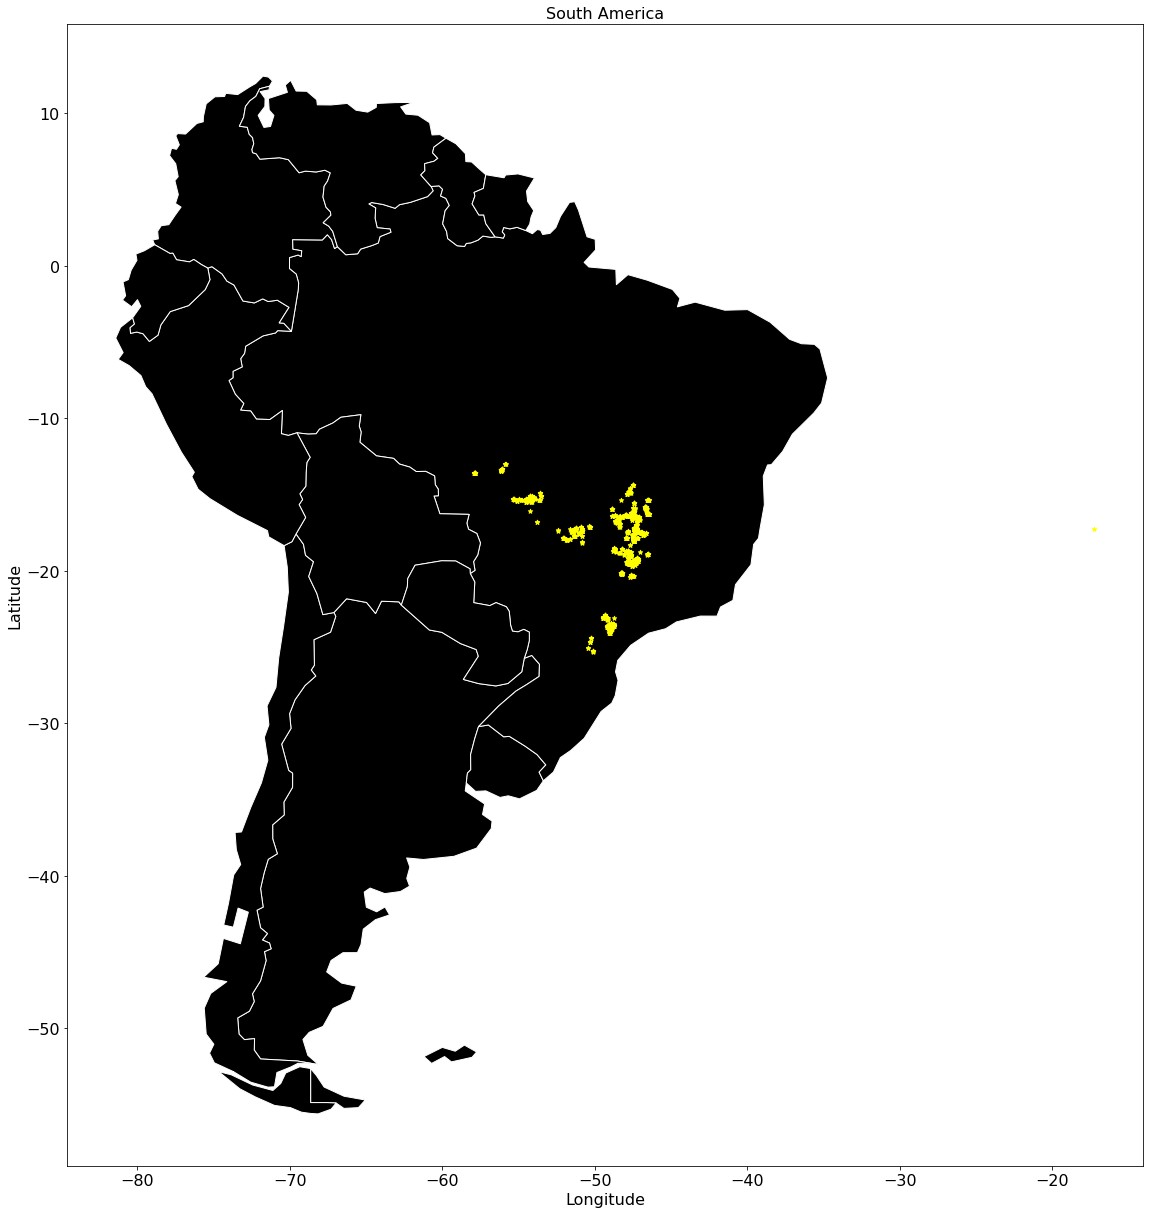

In [1]:
#BRAZIL

temp = pd.read_excel('/mnt/Datasets/Cool-Farm-Tool-GHG-Inputs LATAM_v2.xlsx', 'Farm-Crop-Soil')
temp.columns = temp.iloc[0]
temp = temp.iloc[1:].reset_index(drop = True)
temp = temp[['Field Name', 'Enter Latitude', 'Enter Longitude']]
temp = temp.rename(columns = {'Field Name': 'Field_Name', 'Enter Latitude': 'Latitude', 'Enter Longitude': 'Longitude'})
temp = temp.drop_duplicates().reset_index(drop = True)

temp['Latitude'] = temp['Latitude'].str.replace(',', '.', regex=False)
temp['Latitude_decimal'] = temp['Latitude'].str.replace('S ', '', regex=False)
temp['Latitude_decimal'] = temp['Latitude_decimal'] + ' S'
temp['Latitude_decimal'] = temp['Latitude_decimal'].str.replace(' ', '', regex=False)

pattern = r'(?P<d>[\d\.]+).*?(?P<m>[\d\.]+).*?(?P<s>[\d\.]+).*?(?P<h>[NSWE])'
hemisphere_sig = {'N': 1, 'S': -1, 'E': 1, 'W': -1}

dms = temp['Latitude_decimal'].str.extract(pattern)
dms['h'] = dms['h'].map(hemisphere_sig)
dms = dms.astype(float)
temp['Latitude_decimal'] = dms['h'] * (dms['d'] + dms['m'].div(60) + dms['s'].div(3600))

#Converting longitude to decimal
temp['Longitude'] = temp['Longitude'].str.replace(',', '.', regex=False)
temp['Longitude_decimal'] = temp['Longitude'].str.replace('W ', '', regex=False)
temp['Longitude_decimal'] = temp['Longitude_decimal'] + ' W'
temp['Longitude_decimal'] = temp['Longitude_decimal'].str.replace(' ', '', regex=False)

dms = temp['Longitude_decimal'].str.extract(pattern)
dms['h'] = dms['h'].map(hemisphere_sig)
dms = dms.astype(float)

temp['Longitude_decimal'] = dms['h'] * (dms['d'] + dms['m'].div(60) + dms['s'].div(3600))

print(display(temp))

temp.to_csv('/mnt/Datasets/Lat_Long_Field_Map_Brazil.csv')

temp_geo = gpd.GeoDataFrame(temp,geometry = gpd.points_from_xy(temp.Longitude_decimal,temp.Latitude_decimal))
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world_data[world_data.continent == 'South America'].plot(color = 'black',edgecolor = 'white')
temp_geo.plot(ax = axis, color = 'yellow', markersize = 20, marker='*')
plt.title('South America', fontsize = 16)
plt.xlabel('Longitude', fontsize = 16)
plt.ylabel('Latitude', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

fig = plt.gcf()
fig.set_size_inches(35,21)
#fig.savefig('matplot.png', dpi = 200)
plt.show()

In [72]:
#MEXICO

temp = pd.read_excel('/mnt/Datasets/CFT_MEXICO.xlsx', 'Farm-Crop-Soil')
temp.columns = temp.iloc[0]
temp = temp.iloc[1:].reset_index(drop = True)

temp['Enter Latitude'] = temp['Enter Latitude'].astype(str)

temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'] = temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'].str[:2] + '.' + temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Latitude'].str[2:]
temp.loc[temp['Enter Latitude'].str.contains(","), 'Enter Latitude'] = temp.loc[temp['Enter Latitude'].str.contains(","), 'Enter Latitude'].str[:-2]
temp['Enter Latitude'] = temp['Enter Latitude'].astype(float)

temp['Enter Longitude'] = temp['Enter Longitude'].abs() * (-1)
temp['Enter Longitude'] = temp['Enter Longitude'].astype(str)
temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'] = temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'].str[:4] + '.' + temp.loc[[0,1,2,3,4,5,6,7,25,32,33,68,69], 'Enter Longitude'].str[4:]

temp['Enter Longitude'] = temp['Enter Longitude'].astype(float)

temp = temp[['Field Name', 'Enter Latitude', 'Enter Longitude']]

temp = temp.rename(columns = {'Field Name': 'Field_Name', 'Enter Latitude': 'Latitude', 'Enter Longitude': 'Longitude'})

temp.to_csv('/mnt/Datasets/Mexico_Lat_Lon_Field_Map.csv')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [2]:
#ARGENTINA

temp = pd.read_excel('/mnt/Datasets/CFT_ARG.xlsx', '0-2 Farm-Crop-Soil')
temp.columns = temp.iloc[0]
temp = temp.iloc[3:].reset_index(drop = True)
print(display(temp))

temp = temp[['Harvest Year', 'Field Name']]
temp = temp.rename(columns = {'Harvest Year': 'Year', 'Field Name': 'Field_Name'})
print(display(temp))
temp.to_csv('/mnt/Datasets/Arg_Field_Names.csv')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Harvest Year,Field Name,Climate,Optional - Avg Annual Temperature (℃),Crop Name,Crop Area (ha),Harvested Amount (kg),Farm-gate Ready Amount (kg),Optional - Residue Amount (kg/ha),Residue Management Practice,Seed Amount (kg),Soil Texture,Soil Organic Matter,Soil Moisture,Soil Drainage,Soil pH
0,2019,118,Temperate,NaN,Maize,450.63,1391579.7,4003780,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),2.702727,moist,good,6.4
1,2019,457,Temperate,NaN,Maize,230.8,809933.76,2040040,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),2.503333,moist,good,6.4
2,2019,293,Temperate,NaN,Maize,79,248720,492480,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),3.5,moist,good,6.4
3,2019,87,Temperate,NaN,Maize,547,2077826.76,4544150,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),4.111111,moist,good,6.4
4,2019,88,Temperate,NaN,Maize,323,1171090.42,2664370,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),4.08,moist,good,6.4
5,2019,310,Temperate,NaN,Maize,112,581475,1518100,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),3.5,moist,good,6.4
6,2019,117,Temperate,NaN,Maize,147,524294.692,1678110,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),3.7,moist,good,6.4
7,2019,344,Temperate,NaN,Maize,83,370948,1031960,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),3.2,moist,good,6.4
8,2019,86,Temperate,NaN,Maize,224,965548.812,2711980,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),4.125,moist,good,6.4
9,2019,494,Temperate,NaN,Maize,96,309138,945990,NaN,"Left distributed on field, OR incorporated, OR...",NaN,silt (medium),2.84,moist,good,6.4


None


,Year,Field_Name
0,2019,118
1,2019,457
2,2019,293
3,2019,87
4,2019,88
5,2019,310
6,2019,117
7,2019,344
8,2019,86
9,2019,494


None
